<a href="https://colab.research.google.com/github/shinzokuro/Cnn/blob/alex/fiftyone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fiftyone

     |████████████████████████████████| 133kB 23.8MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.6
    Uninstalling urllib3-1.26.6:
      Successfully uninstalled urllib3-1.26.6


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

Getting data using required classes

In [ ]:
data = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections","segmentation"],
    classes=["person", "car", "truck", "traffic light"],
    max_samples=75,
)

Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-75'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [ ]:
data

Name:        coco-2017-validation-75
Media type:  image
Num samples: 75
Persistent:  False
Tags:        ['validation']
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [ ]:
v = data.view()
print(v)

Dataset:     coco-2017-validation-75
Media type:  image
Num samples: 75
Tags:        ['validation']
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    ---


Exporting data

In [ ]:
export_dir = "/content/data"
label_field = "ground_truth"  # for example

# The Dataset or DatasetView to export


# Export the dataset
data.export(
    export_dir=export_dir,
    dataset_type=fo.types.COCODetectionDataset,
    label_field=label_field,
)

Directory '/content/data' already exists; export will be merged with existing files
 100% |███████████████████| 75/75 [505.7ms elapsed, 0s remaining, 148.3 samples/s]      


In [ ]:
Just some analysis

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
dataDir='/content/data/labels.json'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [ ]:
coco=COCO(dataDir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [ ]:
catIds = coco.getCatIds(catNms=['person','car','truck']);
catIds

[1, 3, 8]

In [ ]:
imgIds = coco.getImgIds(catIds=catIds );
imgIds

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 60,
 68]

In [ ]:
imgIds = coco.getImgIds(imgIds = [1])
imgIds

[1]

In [ ]:

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

{'coco_url': None,
 'file_name': '000000026204-2.jpg',
 'height': 427,
 'id': 1,
 'license': None,
 'width': 640}

In [ ]:
dataDir = '/content/data/data'

I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))

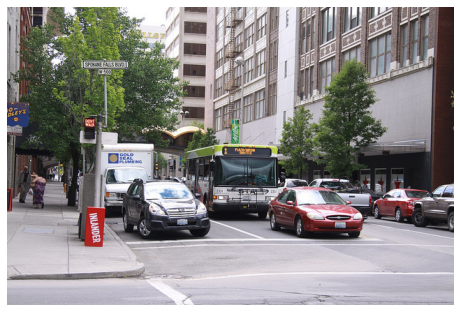

In [ ]:
I = io.imread('%s/%s'%(dataDir,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
#plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#annIds
anns = coco.loadAnns(annIds)
#anns
#coco.showAnns(anns)
anns[0]

{'area': 9768.2364,
 'bbox': [374.63, 257.99, 134.66, 72.54],
 'category_id': 3,
 'id': 1,
 'image_id': 1,
 'iscrowd': 0}